In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from numba import njit, prange

In [4]:
from analysis_routines import * 
from utide import solve
from plotting_routines_xr import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [5]:
data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
df_ci = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
df_c = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fc.csv')
df_s = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_s.csv')
df_buoy = load_buoy_series('AGL_ocean_meteo_20181116.nc')

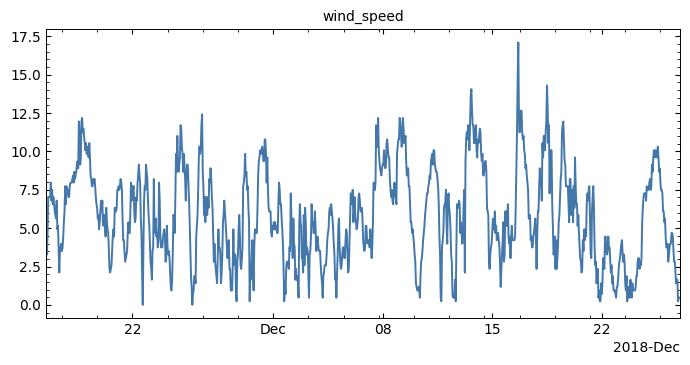

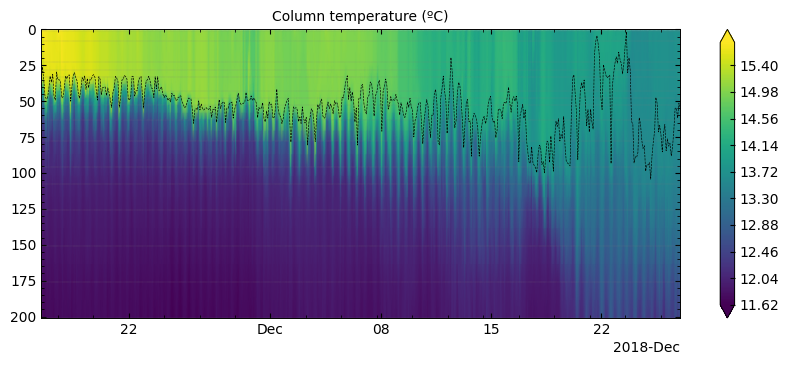

In [7]:
date_1 = datetime(2018, 11, 29)
date_2 = datetime(2018, 11, 30)
def plot_AGL_data(df, var, period=[None, None]):
    
    slice_ = slice(*period)
    
    var_arr = df[slice_][var]
    date = df[slice_].index

    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    
    fig, ax = plt.subplots(figsize=(7, 3.75))
    ax.xaxis.set_major_locator(locator)
    ax.set_xlim(date[0], date[-1])
    ax.xaxis.set_major_formatter(formatter)
    ax.plot(date, var_arr)
    ax.set_title(var)
    fig.tight_layout()
    plt.show()

date_1 = datetime(2018, 11, 16)
date_2 = datetime(2018, 12, 27)
interval = timedelta(minutes=1)
plot_AGL_data(df_buoy, 'wind_speed', period=[date_1, date_2])
plot_column_temperature(data, df_ci, period=[date_1, date_2])

SpearmanrResult(correlation=0.10043676681564025, pvalue=0.0016984848194020114)


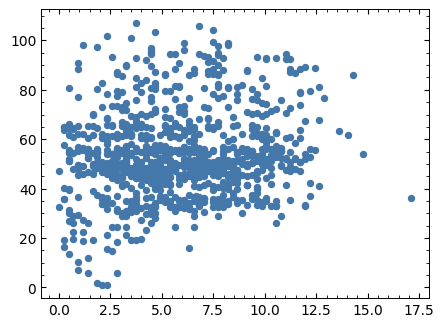

In [242]:
from scipy.stats import chi2_contingency, spearmanr
dn = 12

D1_ = df_ci[datetime(2018, 11, 16):datetime(2018, 12, 27):120*6]['D1'].to_numpy()
wind_speed_ = df_buoy[datetime(2018, 11, 16):datetime(2018,12,27)]['wind_speed'].to_numpy()
obs = np.vstack([D1_, wind_speed_])
plt.scatter(wind_speed_, D1_)
spear = spearmanr(wind_speed_, D1_)
print(spear)

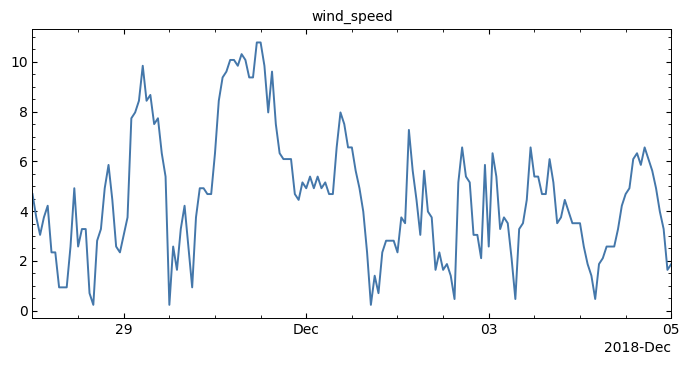

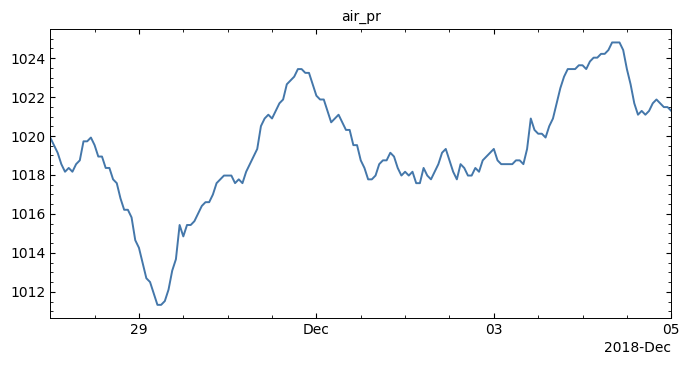

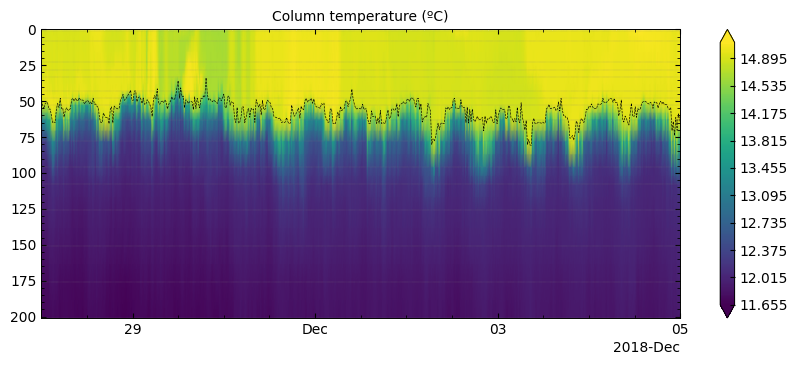

In [11]:

date_1 = datetime(2018, 11, 28)
date_2 = datetime(2018, 12, 5)
plot_AGL_data(df_buoy, 'wind_speed', period=[date_1, date_2])
plot_AGL_data(df_buoy, 'air_pr', period=[date_1, date_2])

plot_column_temperature(data, df_ci, period=[date_1, date_2])

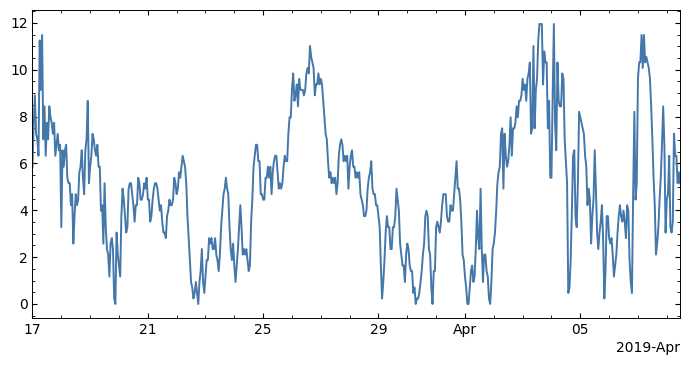

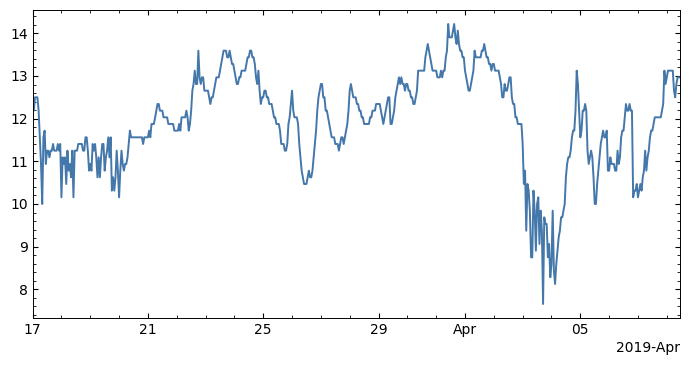

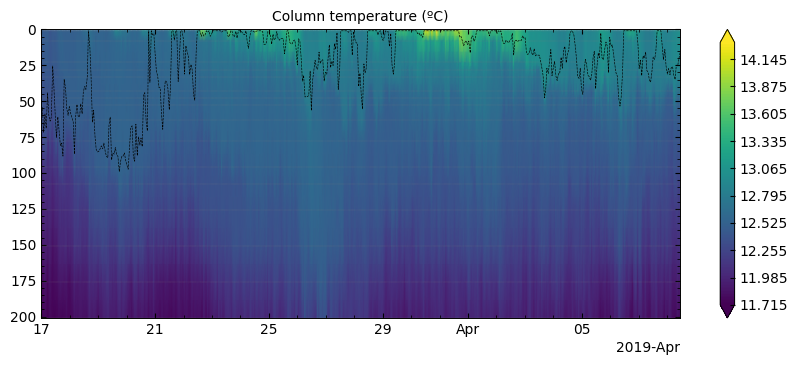

In [227]:
date_1 = datetime(2019, 3, 17)
date_2 = datetime(2019, 3, 27)
interval = timedelta(minutes=1)
plot_AGL_data(df_buoy, 'wind_speed', period=[date_1, None])
plot_AGL_data(df_buoy, 'air_tem', period=[date_1, None])
plot_column_temperature(data, df_ci, period=[date_1, None])